FEUILLE DE TP 11

# Introduction aux schémas numériques pour f(x) = 0

In [132]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Méthode d'itération (ou de point fixe)

Dans cette exercice, on va utiliser les fonctions et les données initiales $x_0$ correspondantes 

> * a) $\quad f(x) =  e^{x} - 1 - x  \quad \text{sur} \quad   [-1, 1],  \quad  x_0 = -0.5$ 
> * b) $\quad f(x) =  x - \sin(x) \quad \text{sur} \quad   [-\frac{\pi}{2}, \frac{5\pi}{2}],  \quad  x_0 = 1$ 
> * c) $\quad f(x) =  x + \sin(x) \quad \text{sur} \quad   [-\frac{\pi}{2}, \frac{5\pi}{2}],  \quad  x_0 = 1$ 
> * d) $\quad f(x) =  x + \cos(x) -1 \quad \text{sur} \quad   [-\frac{\pi}{2}, \frac{5\pi}{2}],  \quad  x_0 = 1$ 
> * e) $\quad f(x) =  x - \cos(x) +1 \quad \text{sur} \quad   [-\frac{\pi}{2}, \frac{5\pi}{2}],  \quad  x_0 = 1$ 

**Remarque**: 
>* Dans a) on cherche la racine $x^\star=0$ de $e^{x} - 1 - 2 x = 0$.
>* Dans les cas tests b), c), d), e), on cherche la racine simple $x^\star = 0$ de $\sin(x) = 0$. 

**Question 1**

> 1. Implémentez les différentes fonctions demandées dans cet exercice.
> 2. Tracez dans des sous-figures séparées le graphe de chaque fonction et ajoutez la droite d'équation $y=x$.
> 3. Déterminez visuellement les points fixes de chaque fonction dans l'intervalle considéré.
> 4. Ajoutez un point (`scatter`) pour chaque point fixe.

In [103]:
f = [lambda x: np.exp(x) - 1 - x,
     lambda x: x - np.sin(x),
     lambda x: x + np.sin(x),
     lambda x: x + np.cos(x) - 1,
     lambda x: x - np.cos(x) + 1,
]

x_init = [-0.5,1,1,1,1]

intervale = [(-1,1),
             (-np.pi/2,5*np.pi/2),
             (-np.pi/2,5*np.pi/2),
             (-np.pi/2,5*np.pi/2),
             (-np.pi/2,5*np.pi/2),
]


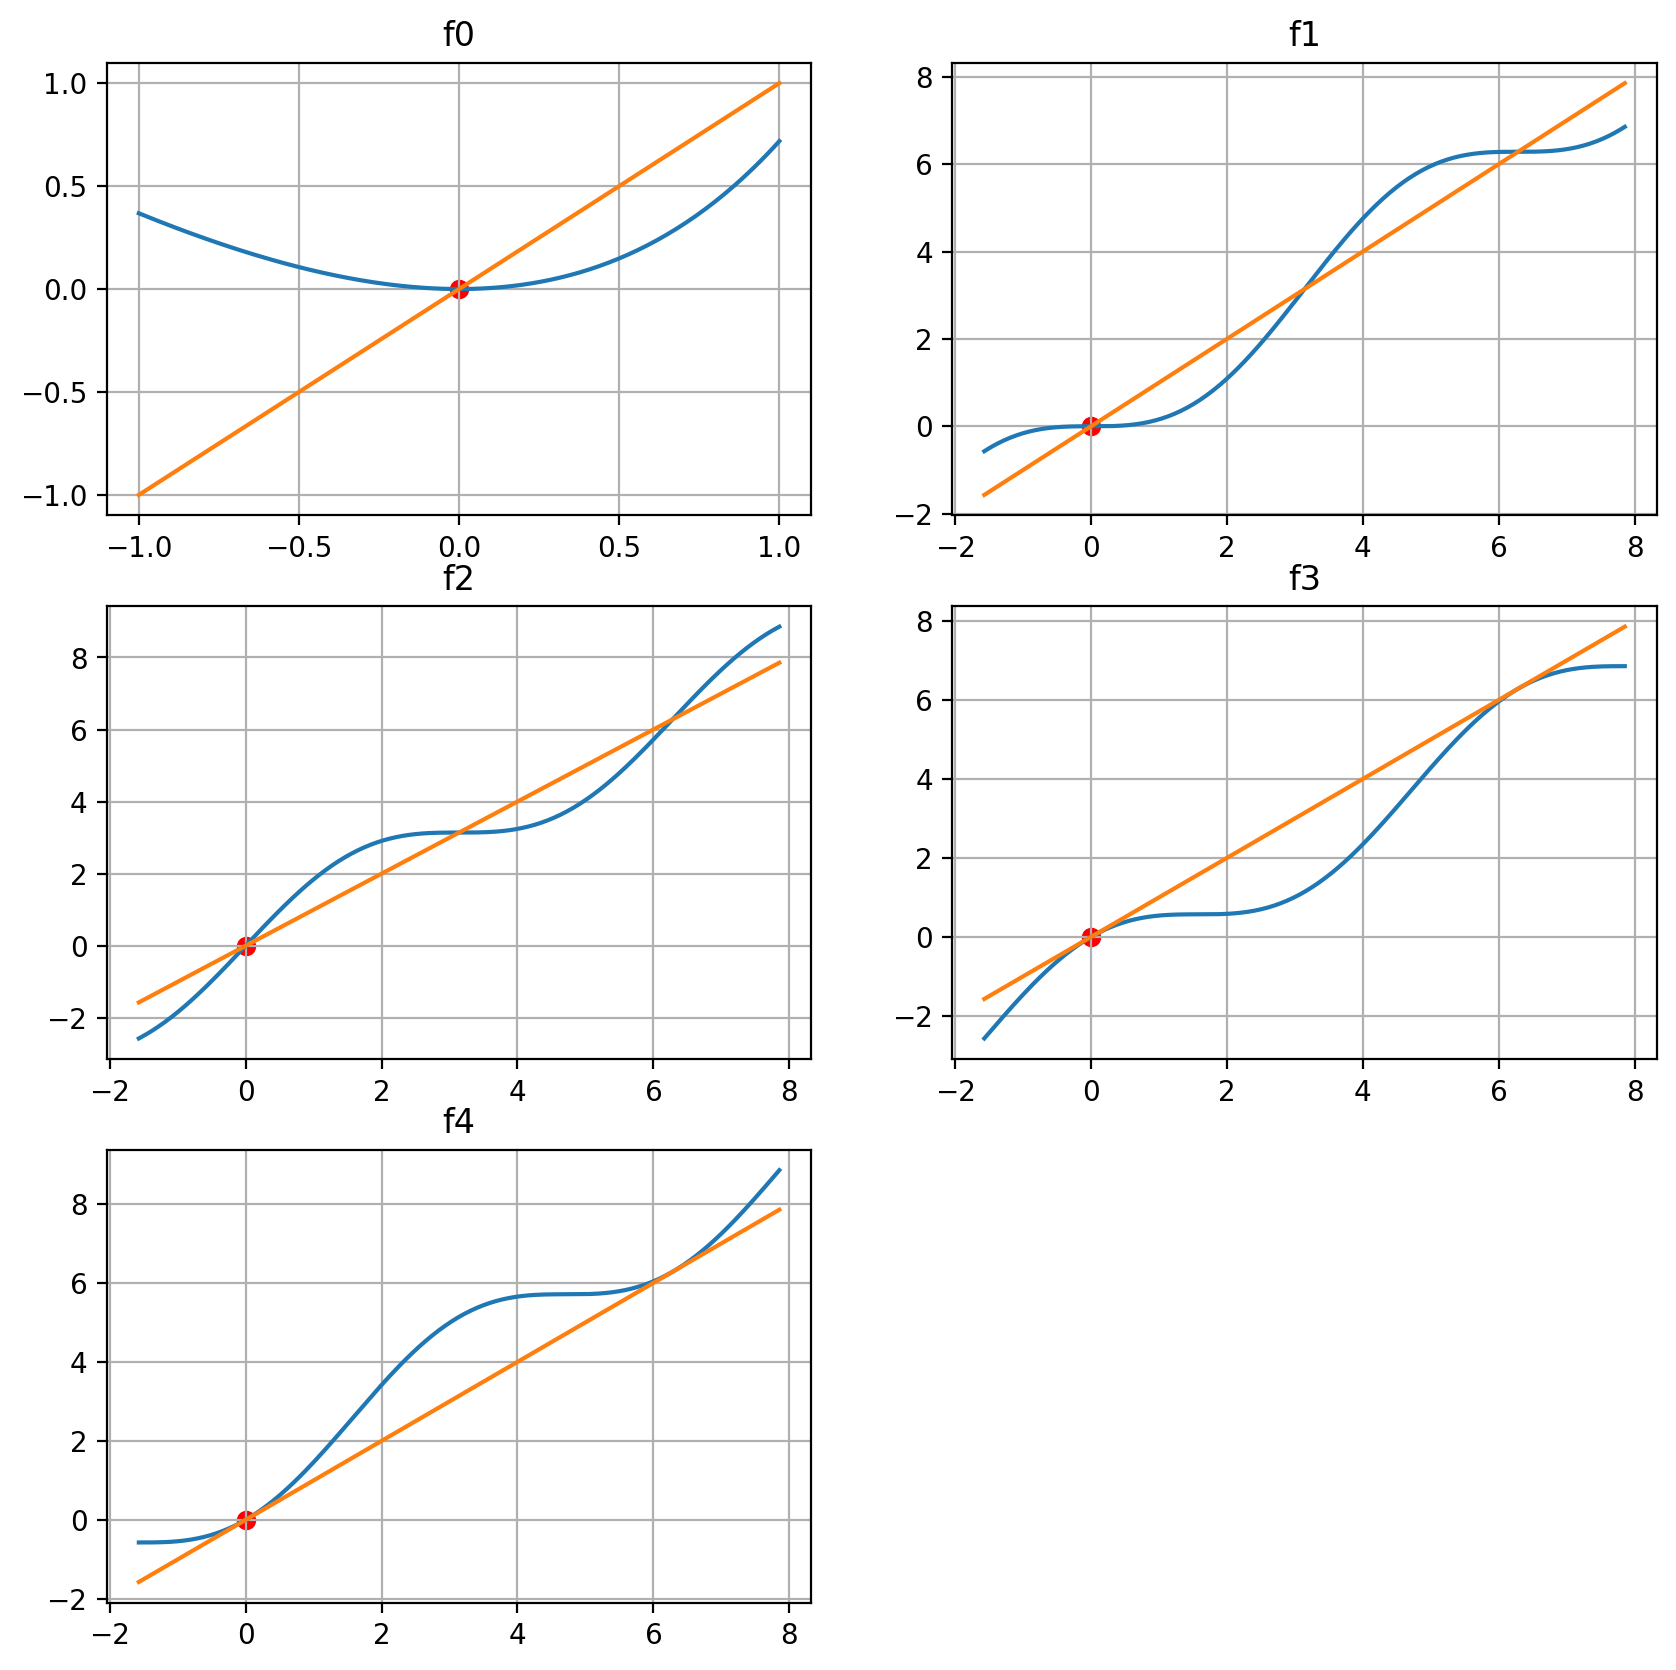

In [104]:
fig = plt.figure(figsize = (10,10))

for k,fk in enumerate(f):
    ax = fig.add_subplot(3,2,k+1)
    x = np.linspace(intervale[k][0],intervale[k][1],200)
    ax.plot(x,fk(x))
    ax.plot(x,x)
    ax.scatter(0,0,color = 'red')
    ax.grid()
    ax.set_title(f'f{k}')

**Question 2**

> Implémentez la méthode du point fixe à travers une fonction `x, niter, xL = point_fixe(f, x0, tol, itermax)`. Les valeurs par défaut de `tol` et de `itermax` seront respectivement `1.e-6` et `5000`.

In [105]:
def point_fixe(f, x0, tol=1.e-6, itermax=5000):
    """
    Recherche de point fixe : méthode brute x_{n+1} = f(x_n)
    
    Parameters
    ----------
    
    f: function
        la fonction dont on cherche le point fixe
    x0: float
        initialisation de la suite
    tol: float (default 1.e-6)
        critère d'arrêt : |x_{n+1} - x_n| < tol
    itermax: int
        le nombre maximal d'itérations autorisées
        
    Returns
    -------
    
    x: float
        la valeur trouvée pour le point fixe
    niter: int
        le nombre d'itérations effectuées
    xL: ndarray
        la suite des itérés de la suite
    """
    xl = [x0]
    niter = 0
    r = tol + 1
    while r > tol and niter < itermax:
        xl.append(f(xl[-1]))
        r = abs(xl[-1] - xl[-2])
        niter += 1
    return [xl[-1],niter,xl]

**Question**

> Pour chacun des cas tests ci-dessus faire
>   * Tracez dans un même graphique la courbe de la fonction $f$ et celle de la droite $x \mapsto x$. 
>   * Générez la suite des itérés $x_n$ de la méthode d'itération du point fixe. 
>   * Représentez sur le même graphique la solution numérique  $x^\star$ obtenue en dessinant un point à la position $(x^\star, f(x^\star))$ 
>   * Ajoutez en titre le nombre d'itérations effectuées pour atteindre le critère d'arrêt.
>   * Représentez la ligne brisée joignant les points
$(x_0,x_0)$, $(x_0,x_1)$, $(x_1, x_1)$, $(x_1, x_2)$, $\ldots$, $(x_n,x_n)$.
>   * Que remarquez-vous ?

**Question**

> Pour chacun des cas tests ci-dessus, faites une figure illustrant l'ordre de convergence de la suite vers le point fixe (attention, le point fixe obtenu n'est pas toujours le même). 
> - Vous pourrez tracer par exemple le nuage de points $(e_n, e_{n+1})$ où $e_n$ est l'erreur $|x_n-\ell|$ à l'étape $n$ avec $\ell$ la valeur limite du point fixe.
> - Pour visualiser l'ordre, vous pourrez ajouter aux graphiques des droites de pente $1$, $2$ ou $3$.
>
> Pouvez-vous expliquer les différents comportements ?

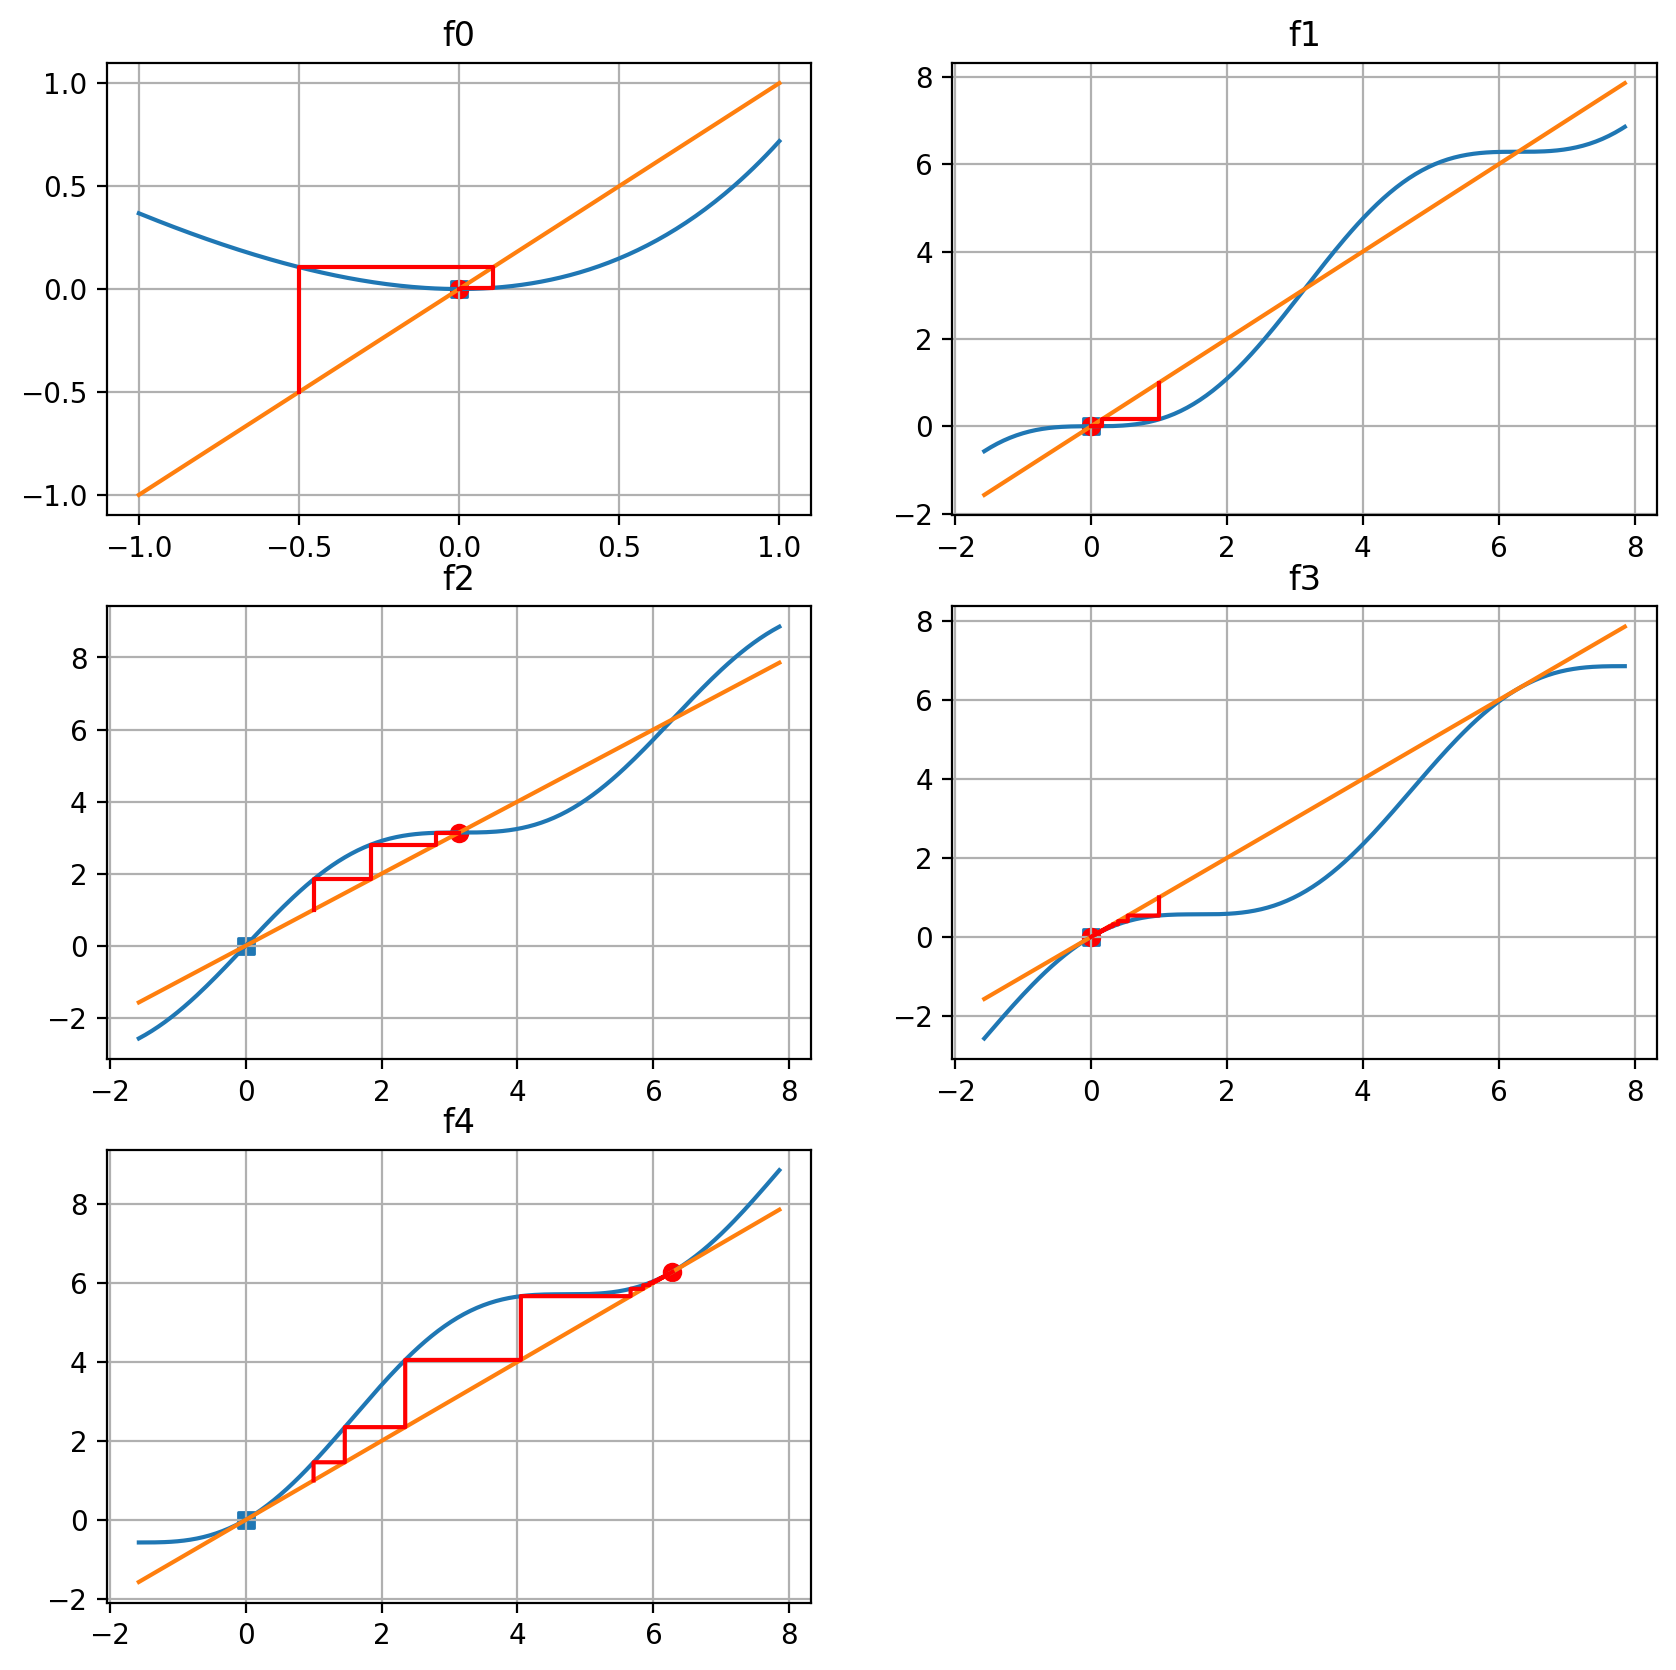

In [124]:
fig = plt.figure(figsize = (10,10))

for k,fk in enumerate(f):
    ax = fig.add_subplot(3,2,k+1)
    x = np.linspace(intervale[k][0],intervale[k][1],200)
    ax.plot(x,fk(x))
    ax.plot(x,x)
    ax.scatter(0,0,marker ='s')
    ax.grid()
    ax.set_title(f'f{k}')
    
    x_etoile,niter,xl = point_fixe(fk,x_init[k],tol=1.e-6, itermax=5000)
    ax.scatter(x_etoile,x_etoile,color = 'red')
    ax.plot(np.repeat(xl,2)[:-1],np.repeat(xl,2)[1:],color = 'red')

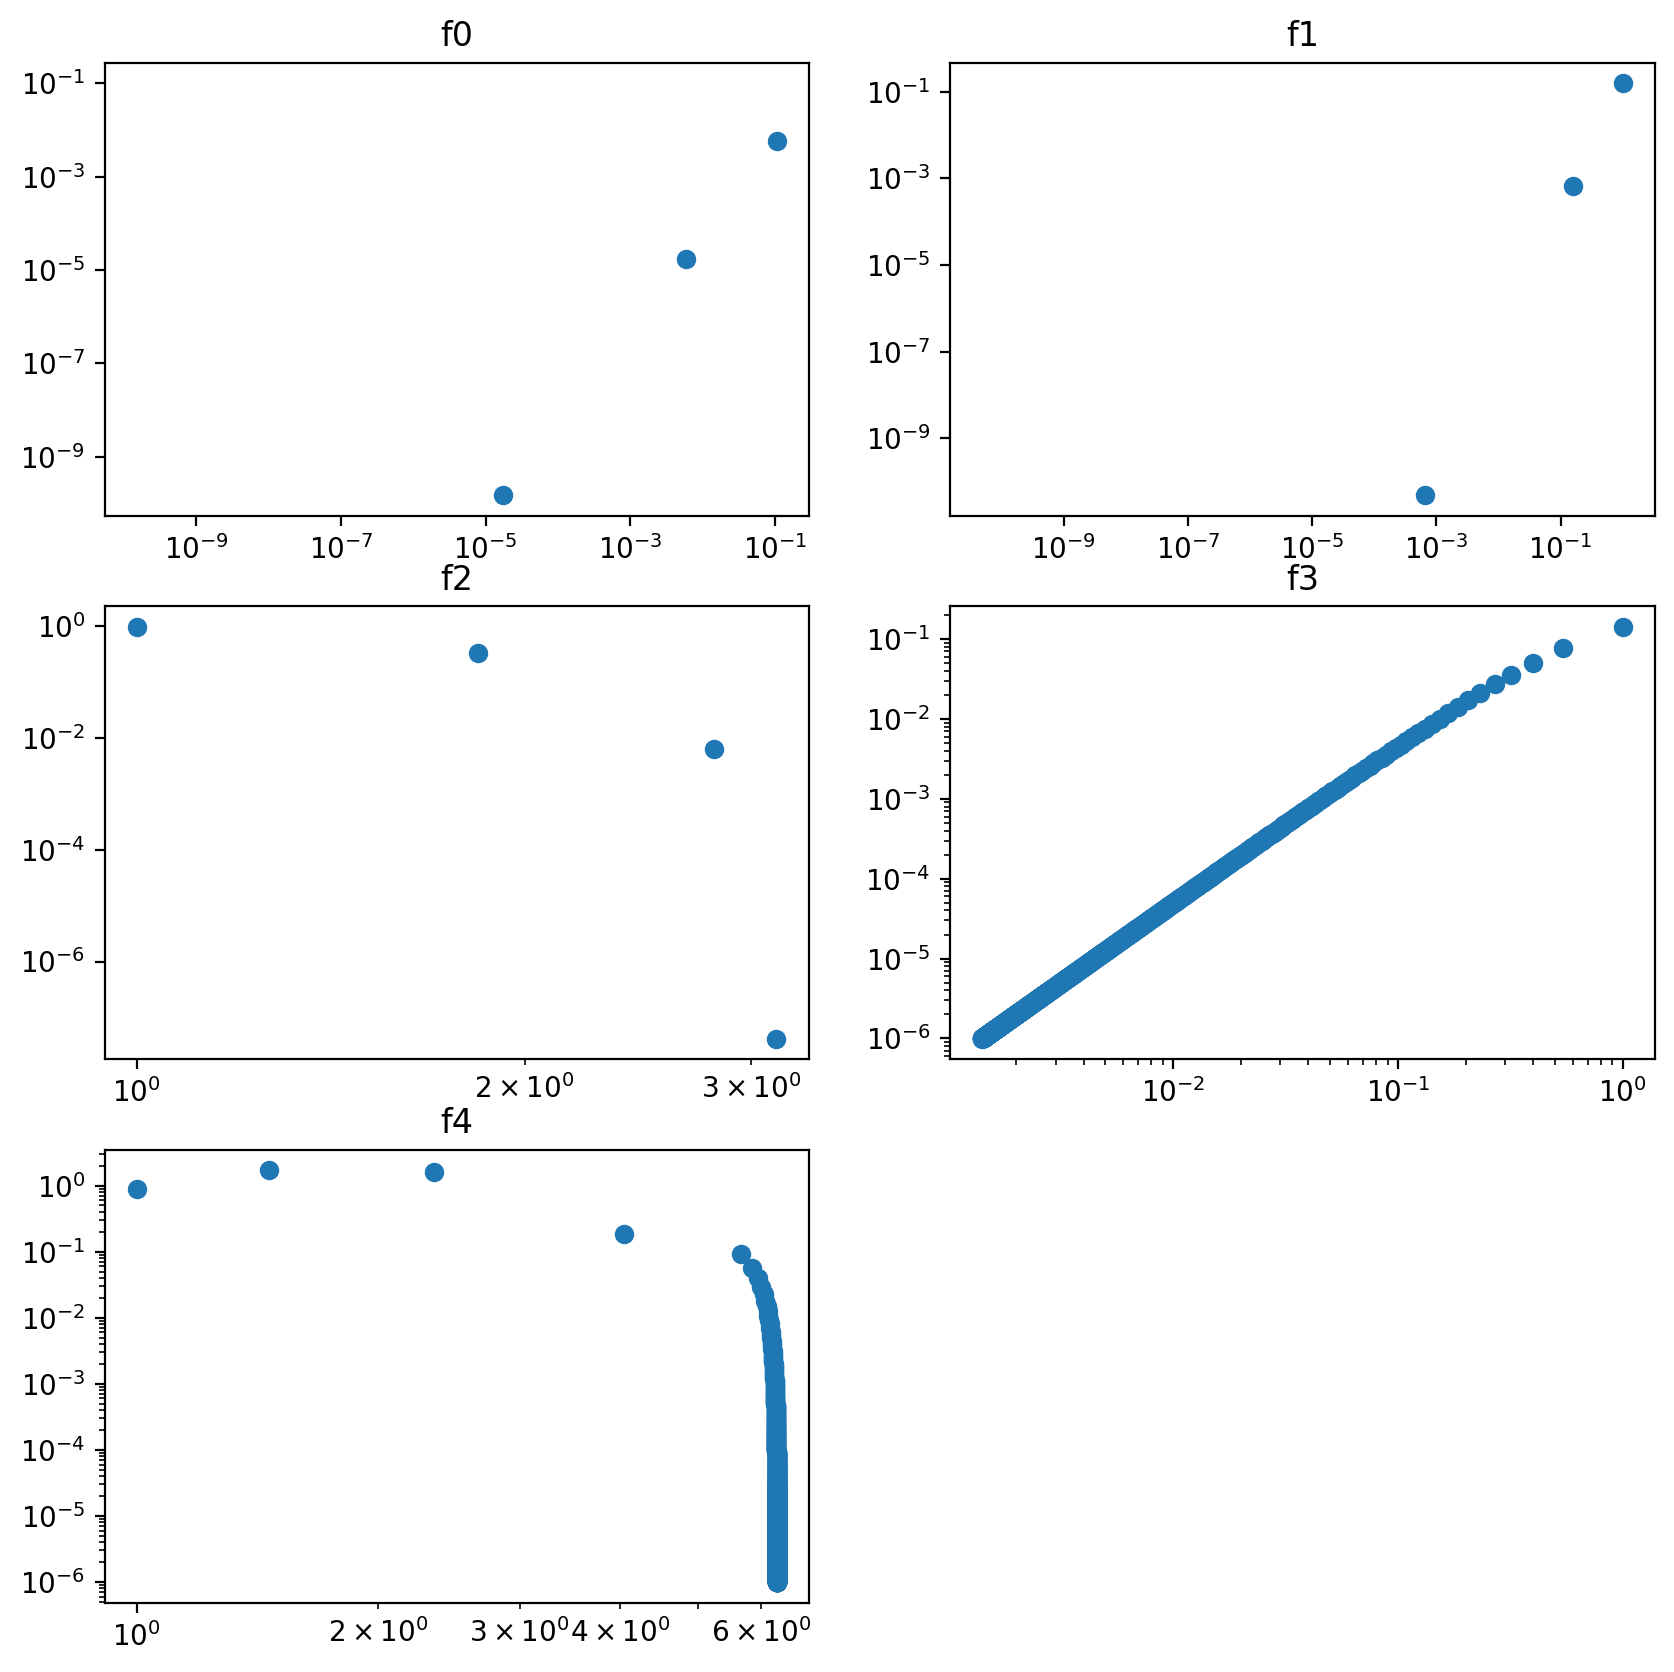

In [163]:
fig = plt.figure(figsize = (10,10))

for k,fk in enumerate(f):
    ax = fig.add_subplot(3,2,k+1)
    x_etoile,niter,xl = point_fixe(fk,x_init[k],tol=1.e-6, itermax=5000)
    f_prime = abs(np.diff(fk(xl)))
    ax.scatter(xl[:-1],f_prime)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'f{k}')

## Exercice 2 (facultatif): convergence de la méthode 

>* Pour chacun des cas tests ci-dessus faire
 * si la méthode converge, 
    * calculer la vitesse de convergence de la suite *(on pourra utiliser la fonction ``traquer_ordre`` du TP10)*
    * calculer la constante asymptotique de convergence de la méthode  
    * estimer le nombre d'itérations nécessaires pour gagner un chiffre exacte et vérifier que c'est le cas effectivement.
 * calculer eventuellement $f^{'}(x^*), f^{''}(x^*), f^{'''}(x^*) $ où $x^*$ est le point fixe de $f$ vers lequel la méthode semble converger et justifier le comportement de la suite générée à la lueur de ces valeurs.